# PISA Scores

You are going to make a research on your own this time. Your goals:

1. Download the [Reading](https://data.oecd.org/pisa/reading-performance-pisa.htm), [Math](https://data.oecd.org/pisa/mathematics-performance-pisa.htm#indicator-chart) and [Science](https://data.oecd.org/pisa/science-performance-pisa.htm#indicator-chart) scores from OECD separately. Downlaod the data as illustrated below. First select "Perspectives" as "Total", secondly Download "Selected Data only".
2. Read CSV Files using `Pandas`.
3. Calculate the Average PISA score by $\frac{Math + Science + Reading}{3}$. 
4. Plot the average scores of OECD countries. 

![How to download](https://itueconomics.github.io/bil113e/assets/oecd-pisa.JPG)

- Be careful about the file names. Each download have a different name. 

You need to upload your work to [Ninova](http://ninova.itu.edu.tr) as an `HTML` file.

Good luck!

# Question 1

I seperatelly downloaded my files and named them `reading.csv`, `math.csv` and `science.csv`.

# Question 2

Firstly I import my libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Be careful if your csv files and notebook are in the same folder. You can either check the folder you are working or command:
!dir

 Volume in drive C is Disk
 Volume Serial Number is 00AE-2429

 Directory of C:\Users\af\Desktop\quiz 3

20.05.2018  18:34    <DIR>          .
20.05.2018  18:34    <DIR>          ..
03.05.2018  11:57    <DIR>          .ipynb_checkpoints
20.05.2018  18:15             2.428 math.csv
20.05.2018  18:15             2.428 reading.csv
20.05.2018  18:15             2.508 science.csv
20.05.2018  18:34            48.498 Untitled.ipynb
               4 File(s)         55.862 bytes
               3 Dir(s)  31.956.430.848 bytes free


In [3]:
reading = pd.read_csv('reading.csv')
math = pd.read_csv('math.csv')
science = pd.read_csv('science.csv')

Let's check out the dataframes:

In [4]:
reading.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PISAREAD,TOT,MEANSCORE,A,2015,503,NaN
1,AUT,PISAREAD,TOT,MEANSCORE,A,2015,485,NaN
2,BEL,PISAREAD,TOT,MEANSCORE,A,2015,499,NaN
3,CAN,PISAREAD,TOT,MEANSCORE,A,2015,527,NaN
4,CZE,PISAREAD,TOT,MEANSCORE,A,2015,487,NaN


In [5]:
math.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PISAMATH,TOT,MEANSCORE,A,2015,494,NaN
1,AUT,PISAMATH,TOT,MEANSCORE,A,2015,497,NaN
2,BEL,PISAMATH,TOT,MEANSCORE,A,2015,507,NaN
3,CAN,PISAMATH,TOT,MEANSCORE,A,2015,516,NaN
4,CZE,PISAMATH,TOT,MEANSCORE,A,2015,492,NaN


In [6]:
science.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PISASCIENCE,TOT,MEANSCORE,A,2015,510,NaN
1,AUT,PISASCIENCE,TOT,MEANSCORE,A,2015,495,NaN
2,BEL,PISASCIENCE,TOT,MEANSCORE,A,2015,502,NaN
3,CAN,PISASCIENCE,TOT,MEANSCORE,A,2015,528,NaN
4,CZE,PISASCIENCE,TOT,MEANSCORE,A,2015,493,NaN


# Question 3

Only `Value` columns are important for us. You can do this question in many ways. I will create a new dataframe and import the `Value` columns into new one.

In [7]:
df = pd.DataFrame()

In [8]:
df['math'] = math['Value']

In [9]:
df['reading'] = reading['Value']

In [10]:
df['science'] = science['Value']

In [11]:
df.index = math['LOCATION']

Let's see new dataframe:

In [12]:
df.head()

,math,reading,science
LOCATION,,,
AUS,494,503,510.0
AUT,497,485,495.0
BEL,507,499,502.0
CAN,516,527,528.0
CZE,492,487,493.0


In [13]:
df['Average'] = df.mean(1) # 1 inside the `mean(1)` is to find the means of rows. 

In [14]:
df.head()

,math,reading,science,Average
LOCATION,,,,
AUS,494,503,510.0,502.333333
AUT,497,485,495.0,492.333333
BEL,507,499,502.0,502.666667
CAN,516,527,528.0,523.666667
CZE,492,487,493.0,490.666667


# Question 4

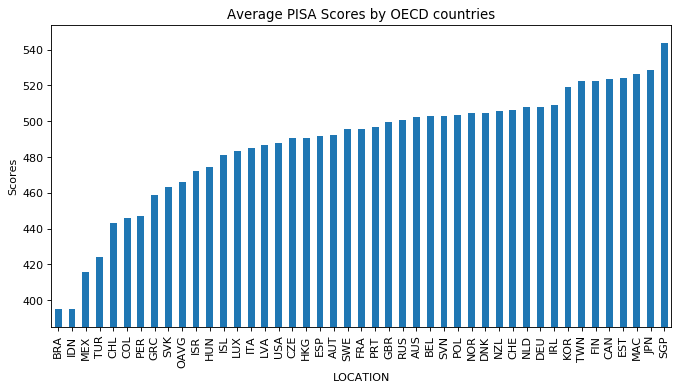

In [15]:
plt.figure(figsize=(10,5), dpi=80)
plt.title('Average PISA Scores by OECD countries')
plt.ylabel('Scores')
plt.ylim(df['Average'].min()-10,df['Average'].max()+10)
df['Average'].sort_values().plot('bar')